In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf
import json

import ml_tools
import graphs

In [6]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [7]:
with open('lstm_config.json') as config_file:
    conf = json.load(config_file)

In [8]:
features = ['ENERGY', 'WS1', 'TEMP1', 'IRRAD1']

In [9]:
data = pd.read_excel('full_data.xlsx', sheet_name='data')
data['DateTime'] = pd.to_datetime(data['DateTime'])

C:\Users\PC21\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\PC21\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\PC21\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\PC21\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

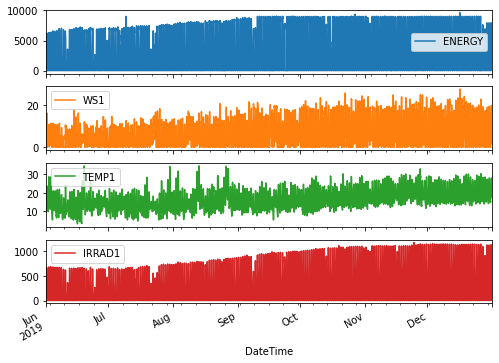

In [10]:
data.set_index('DateTime', inplace=True)
data = data.astype(float)
data = data[features]
out_var = 'ENERGY'
data.plot(subplots = True)
#data_u = np.concatenate((data[out_var].values,np.flipud(data[out_var].values)))#duplicado y flipiado
dataset = data.values


In [11]:
train_split= ml_tools.data_split(dataset, 90)
#Normalize Just Train
dataset, data_mean, data_std = ml_tools.normaize(dataset)

In [12]:
past_hist= 120
future_target = 1
STEP = 1

In [13]:
x_train, y_train = ml_tools.multivariate_data(dataset, dataset[:, 0], 0,
                                                 train_split, past_hist,
                                                 future_target, STEP)
x_val, y_val = ml_tools.multivariate_data(dataset, dataset[:, 0],
                                             train_split, None, past_hist,
                                             future_target, STEP)

In [14]:
model = Sequential()
model.add(LSTM(120, return_sequences=True, input_shape=x_train.shape[-2:]))
model.add(LSTM(16, activation ='relu'))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
m_performance = model.fit(x_train, y_train, batch_size = 256, epochs= 10, shuffle = False, validation_data = (x_val, y_val))


Train on 4502 samples, validate on 393 samples
Epoch 1/10
4502/4502 [==============================] - 30s 7ms/step - loss: 0.9339 - val_loss: 0.7549
Epoch 2/10
4502/4502 [==============================] - 17s 4ms/step - loss: 0.5560 - val_loss: 0.4488
Epoch 3/10
4502/4502 [==============================] - 16s 4ms/step - loss: 0.4798 - val_loss: 0.5604
Epoch 4/10
4502/4502 [==============================] - 16s 4ms/step - loss: 0.4560 - val_loss: 0.5160
Epoch 5/10
4502/4502 [==============================] - 17s 4ms/step - loss: 0.4323 - val_loss: 0.4972
Epoch 6/10
4502/4502 [==============================] - 18s 4ms/step - loss: 0.4334 - val_loss: 0.4012
Epoch 7/10
4502/4502 [==============================] - 18s 4ms/step - loss: 0.4074 - val_loss: 0.4295
Epoch 8/10
4502/4502 [==============================] - 17s 4ms/step - loss: 0.3807 - val_loss: 0.5376
Epoch 9/10
4502/4502 [==============================] - 16s 3ms/step - loss: 0.4017 - val_loss: 0.4480
Epoch 10/10
4502/4502 [===